In [17]:
import sys
import os

sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"..")))

from Datos.Data_acq import get_mnist_data
#import Data_acq as data
from models import Encoder
from models import Decoder
from models import cVAE
import matplotlib.pyplot as plt
import importlib

import importlib
import numpy as np
importlib.reload(Encoder)
importlib.reload(Decoder)
import tensorflow as tf
from keras.callbacks import EarlyStopping
importlib.reload(cVAE)
import importlib
#importlib.reload(data)
dataset="mnist"
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = get_mnist_data()

original_dim = 28*28
beta = 5

train_dataset = tf.data.Dataset.from_tensor_slices(((x_train, y_train), x_train))
train_dataset = train_dataset.batch(128)

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True  
)

val_dataset = tf.data.Dataset.from_tensor_slices(((x_val, y_val), x_val))
val_dataset = val_dataset.batch(128)

#intermediate_dim=[128,256,512,1024]
#latent_dim=[2, 64, 128, 256]
    
intermediate_dim=[256]
latent_dim=[64]

for i in range(len(intermediate_dim)):
    en = Encoder.build_enconder(intermediate_dim=intermediate_dim[i],latent_dim=latent_dim[i])
    de = Decoder.build_decoder(intermediate_dim=intermediate_dim[i],latent_dim=latent_dim[i])
    
cvae = cVAE.CVAE(encoder=en, decoder=de, original_dim=original_dim, beta=beta)
cvae.compile(optimizer=tf.keras.optimizers.Adam())

cvae.fit(train_dataset,
        epochs=100,
        batch_size=128,
        validation_data=val_dataset,
        callbacks=[early_stopping]
        )

en.save(f"en_int_{intermediate_dim[i]}_lat_{latent_dim[i]}_{dataset}.keras")
de.save(f"de_int_{intermediate_dim[i]}_lat_{latent_dim[i]}_{dataset}.keras")




Usando mnist como dataset
Epoch 1/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - kl_loss: 0.3919 - loss: 70.1683 - reconstruction_loss: 68.2089 - val_kl_loss: 9.7616e-04 - val_loss: 43.4538 - val_reconstruction_loss: 43.5409
Epoch 2/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - kl_loss: 7.8712e-04 - loss: 43.7709 - reconstruction_loss: 43.7670 - val_kl_loss: 3.4951e-04 - val_loss: 41.4791 - val_reconstruction_loss: 41.5620
Epoch 3/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl_loss: 3.8532e-04 - loss: 42.7504 - reconstruction_loss: 42.7485 - val_kl_loss: 3.3935e-04 - val_loss: 41.1606 - val_reconstruction_loss: 41.2573
Epoch 4/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - kl_loss: 8.2204e-04 - loss: 42.5323 - reconstruction_loss: 42.5281 - val_kl_loss: 0.0032 - val_loss: 41.0111 - val_reconstruction_loss: 41.0868
Epoch 5/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - kl_loss: 0.0054 - loss: 42.4079 - reconstruction_loss: 42.3807 - val_kl_loss: 0.0096 - val_loss: 40.8830 - val_re

In [ ]:
from keras.models import load_model
from custom_layers.Sampling import Sampling  # Si usás esta capa personalizada

en1 = load_model(f"encoders/en_int_512_lat_256_mnist.keras", custom_objects={"Sampling": Sampling})
de1 = load_model(f"decoders/de_int_512_lat_256_mnist.keras")
cvae1 = cVAE.CVAE(encoder=en1, decoder=de1, original_dim=original_dim, beta=1)
cvae1.compile(optimizer=tf.keras.optimizers.Adam())

In [16]:
en.save(f"en_int_{intermediate_dim[i]}_lat_{latent_dim[i]}_{dataset}.keras")
de.save(f"de_int_{intermediate_dim[i]}_lat_{latent_dim[i]}_{dataset}.keras")



In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(),"..")))


from Datos.Data_acq import get_mnist_data
#import Data_acq as data
from models import Encoder
from models import Decoder
from models import cVAE
import matplotlib.pyplot as plt
import importlib
import tensorflow as tf

from keras.callbacks import EarlyStopping
import models.Predictor as predictores

dataset="mnist"
x_train, x_test,x_val ,y_train, y_test,y_val, x_train_1, y_train_1 = get_mnist_data()


predictor = predictores.build_predictor() 


optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

predictor.compile(optimizer, loss="categorical_crossentropy")

early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True  
)

#x_rain_conv = np.reshape(x_train,(28,28,1)) 
predictor.fit(
    x=x_train,
    y=y_train,
    batch_size=128,
    epochs=100,
    validation_data=(x_val, y_val),  # Include validation data
    callbacks=[early_stopping]  # Add early_stopping to callbacks
)



Usando mnist como dataset


Model: "predictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ original_input (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_layer_2 (ReshapeLayer)  │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 14, 14, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 7, 7, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        31,370 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,570 (197.54 KB)

 Trainable params: 50,378 (196.79 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 16s 31ms/step - loss: 0.5795 - val_loss: 0.2692
Epoch 2/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - loss: 0.1098 - val_loss: 0.0633
Epoch 3/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0863 - val_loss: 0.0493
Epoch 4/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - loss: 0.0715 - val_loss: 0.0492
Epoch 5/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - loss: 0.0642 - val_loss: 0.0569
Epoch 6/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 13s 30ms/step - loss: 0.0567 - val_loss: 0.0490
Epoch 7/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - loss: 0.0480 - val_loss: 0.0445
Epoch 8/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - loss: 0.0490 - val_loss: 0.0541
Epoch 9/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0465 - val_loss: 0.0474
Epoch 10/100
430/430 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - loss: 0.0473 - val_loss: 0.0509


ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=../predictores/CCE_Conv2D.

In [15]:

predictor.save("predictores/CCE_Conv2D.keras")

Shape de x_train
(10, 784)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  0
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  1
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  2
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  3
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━

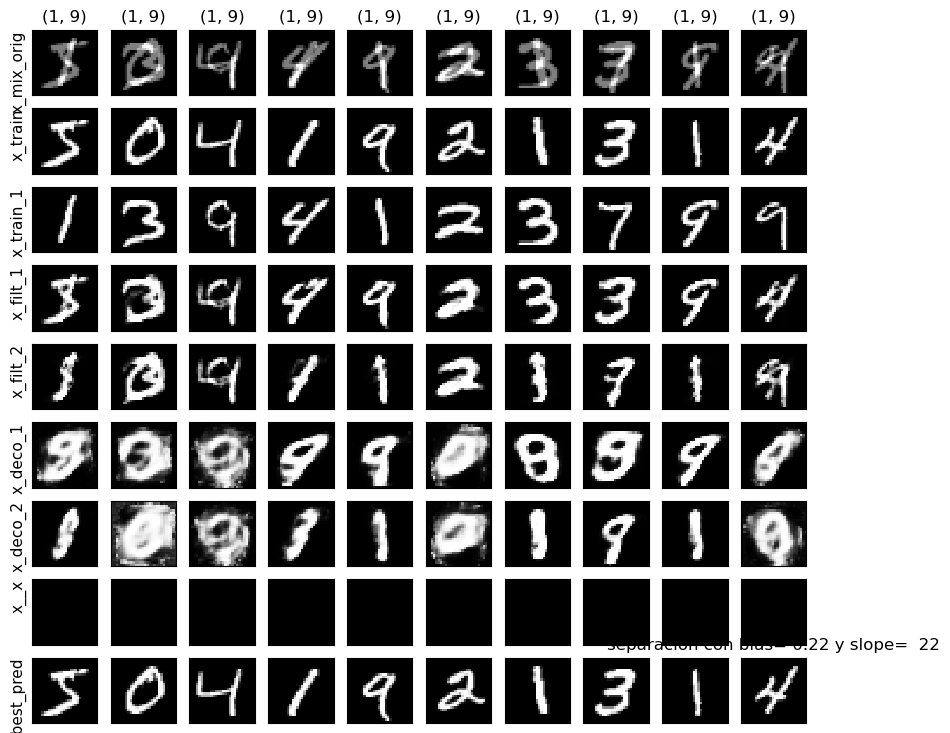

In [20]:
import inferencias.inferencia as inf
import importlib
importlib.reload(inf)

n_pictures=10

inf.separar_digitos(x_train[0:n_pictures],x_train_1[0:n_pictures],y_train[0:n_pictures],
                    y_train_1[0:n_pictures],cvae1,predictor,num_col=n_pictures,show_graph=True,show_laten=False,Iterations=5 )

Shape de x_train
(10, 784)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  0
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  1
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  2
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  3
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
condition_decoder_1 shape: (10, 10)
x_filtrado_1 shape: (10, 784)
z shape: (10, 256)
ITERACIÓN A:  4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━

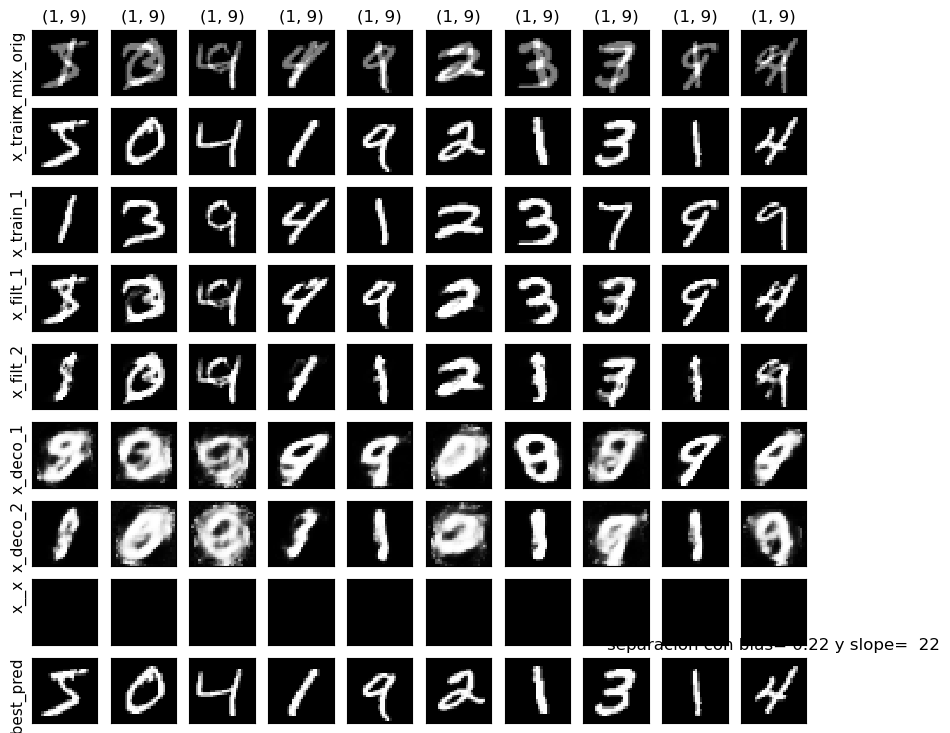

In [21]:
import inferencias.inferencia as inf
import importlib
importlib.reload(inf)

n_pictures=10

inf.separar_digitos(x_train[0:n_pictures],x_train_1[0:n_pictures],y_train[0:n_pictures],
                    y_train_1[0:n_pictures],cvae,predictor,num_col=n_pictures,show_graph=True,show_laten=False,Iterations=5 )